In [1]:
from central import Central
import matplotlib.pyplot as plt
from numba import njit
import numpy as np
import pandas as pd

In [2]:
robot = Central()

In [3]:
robot.get_normal_data_csv('C:\\Users\\johnk\\Google Drive\\My_Project\\Dados\\Data_D1_3k_icmarkets.csv', drop=True, drop_list=['Unnamed: 0'])

Dados Carregados com Sucesso.


In [4]:
robot.get_normal_data()

,EURCHF_Open,EURCHF_Close,EURCHF_High,EURCHF_Low,EURGBP_Open,EURGBP_Close,EURGBP_High,EURGBP_Low,EURJPY_Open,EURJPY_Close,...,AUDNZD_High,AUDNZD_Low,NZDCAD_Open,NZDCAD_Close,NZDCAD_High,NZDCAD_Low,AUDCAD_Open,AUDCAD_Close,AUDCAD_High,AUDCAD_Low
0,1.14620,1.14167,1.15173,1.13983,0.88087,0.87562,0.88222,0.87368,111.043,111.360,...,1.26220,1.24938,0.81814,0.81822,0.82062,0.81419,1.03273,1.03303,1.03405,1.02792
1,1.14168,1.16869,1.17343,1.13951,0.87563,0.87221,0.88072,0.86994,111.359,111.096,...,1.26104,1.25190,0.81822,0.82315,0.82831,0.81798,1.03302,1.03676,1.04284,1.03279
2,1.16986,1.17044,1.17108,1.16874,0.87220,0.86750,0.87428,0.86618,111.140,111.150,...,1.26627,1.25226,0.82444,0.82450,0.82584,0.82346,1.03768,1.03799,1.03880,1.03745
3,1.17046,1.18584,1.19403,1.16999,0.86749,0.87369,0.87440,0.86533,111.154,111.685,...,1.27250,1.25705,0.82450,0.82797,0.82827,0.82265,1.03800,1.04187,1.04254,1.03535
4,1.18636,1.18441,1.18961,1.17522,0.87208,0.87200,0.87255,0.87146,111.668,110.772,...,1.26923,1.26621,0.82806,0.83368,0.83702,0.82781,1.04192,1.04472,1.04796,1.03983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.10884,1.10550,1.10940,1.10485,0.85036,0.84888,0.85106,0.84713,130.079,130.085,...,1.08433,1.08159,0.88353,0.88284,0.88557,0.88194,0.95633,0.95748,0.95946,0.95609
2996,1.10563,1.10527,1.10871,1.10433,0.84904,0.85861,0.85905,0.84851,130.094,130.286,...,1.08743,1.08231,0.88326,0.88713,0.88726,0.87991,0.95762,0.96288,0.96399,0.95490
2997,1.10538,1.10256,1.10561,1.10222,0.85863,0.86363,0.86630,0.85813,130.300,130.334,...,1.08649,1.08287,0.88717,0.88344,0.88857,0.88242,0.96292,0.95928,0.96491,0.95802
2998,1.10302,1.10098,1.10405,1.10040,0.86376,0.86754,0.86817,0.86209,130.341,130.161,...,1.08641,1.08254,0.88348,0.88646,0.88872,0.88342,0.95938,0.96114,0.96293,0.95934


In [5]:
eur = robot.get_normal_data()['EURUSD_Open']

In [108]:
@njit
def SMA(array, periodo):
    sma = np.empty((array.size), dtype='float64')
    for i in np.arange(array.size):
        if i < periodo:
            sma[i] = array[i]
            continue
        calc = 0
        for j in np.arange(periodo):
            calc += array[i-j]
        sma[i] = calc / periodo

    return sma

In [111]:
%%time
sma = np.around(SMA(eur.to_numpy(), 20),5)
# 900ms
# 1ms

Wall time: 997 µs


In [121]:
%%time
pandas = eur.rolling(20).mean()

Wall time: 2.99 ms


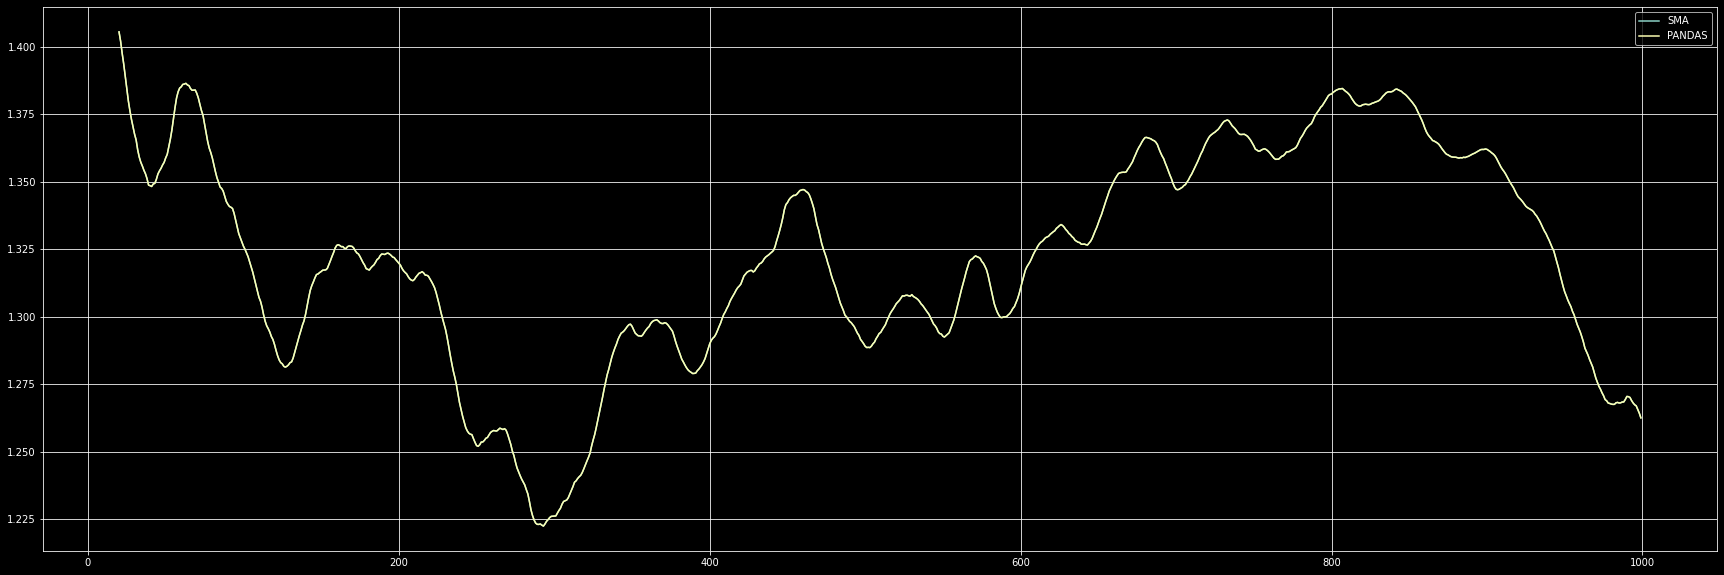

In [122]:
plt.plot(pd.Series(sma).iloc[20:1000], label='SMA')
plt.plot(eur.rolling(20).mean()[20:1000], label='PANDAS')
plt.legend()
plt.grid()
plt.show()

In [119]:
(np.around(sma, 5) == pandas).sum()

108

In [97]:
(np.around(ema_no_coef, 5) == ema_pandas).sum()

0

In [98]:
(np.around(ema_pmo, 5) == ema_pandas).sum()

0